In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Training dataset
df=pd.read_csv("train.csv")

In [81]:
df.drop('area_code',inplace=True,axis=1)
df=df.drop('state',axis=1)

In [82]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [83]:
#converting categorical data to numeric
mapping={
    "no":0,
    "yes":1
}

In [84]:
df['churn']=df['churn'].map(mapping)
df['international_plan']=df['international_plan'].map(mapping)
df['voice_mail_plan']=df['voice_mail_plan'].map(mapping)

In [85]:
df.keys()

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [86]:
df.isnull().values.any()

False

In [87]:
df['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [88]:
#because churn is target variable
df2=df.drop('churn',axis=1)

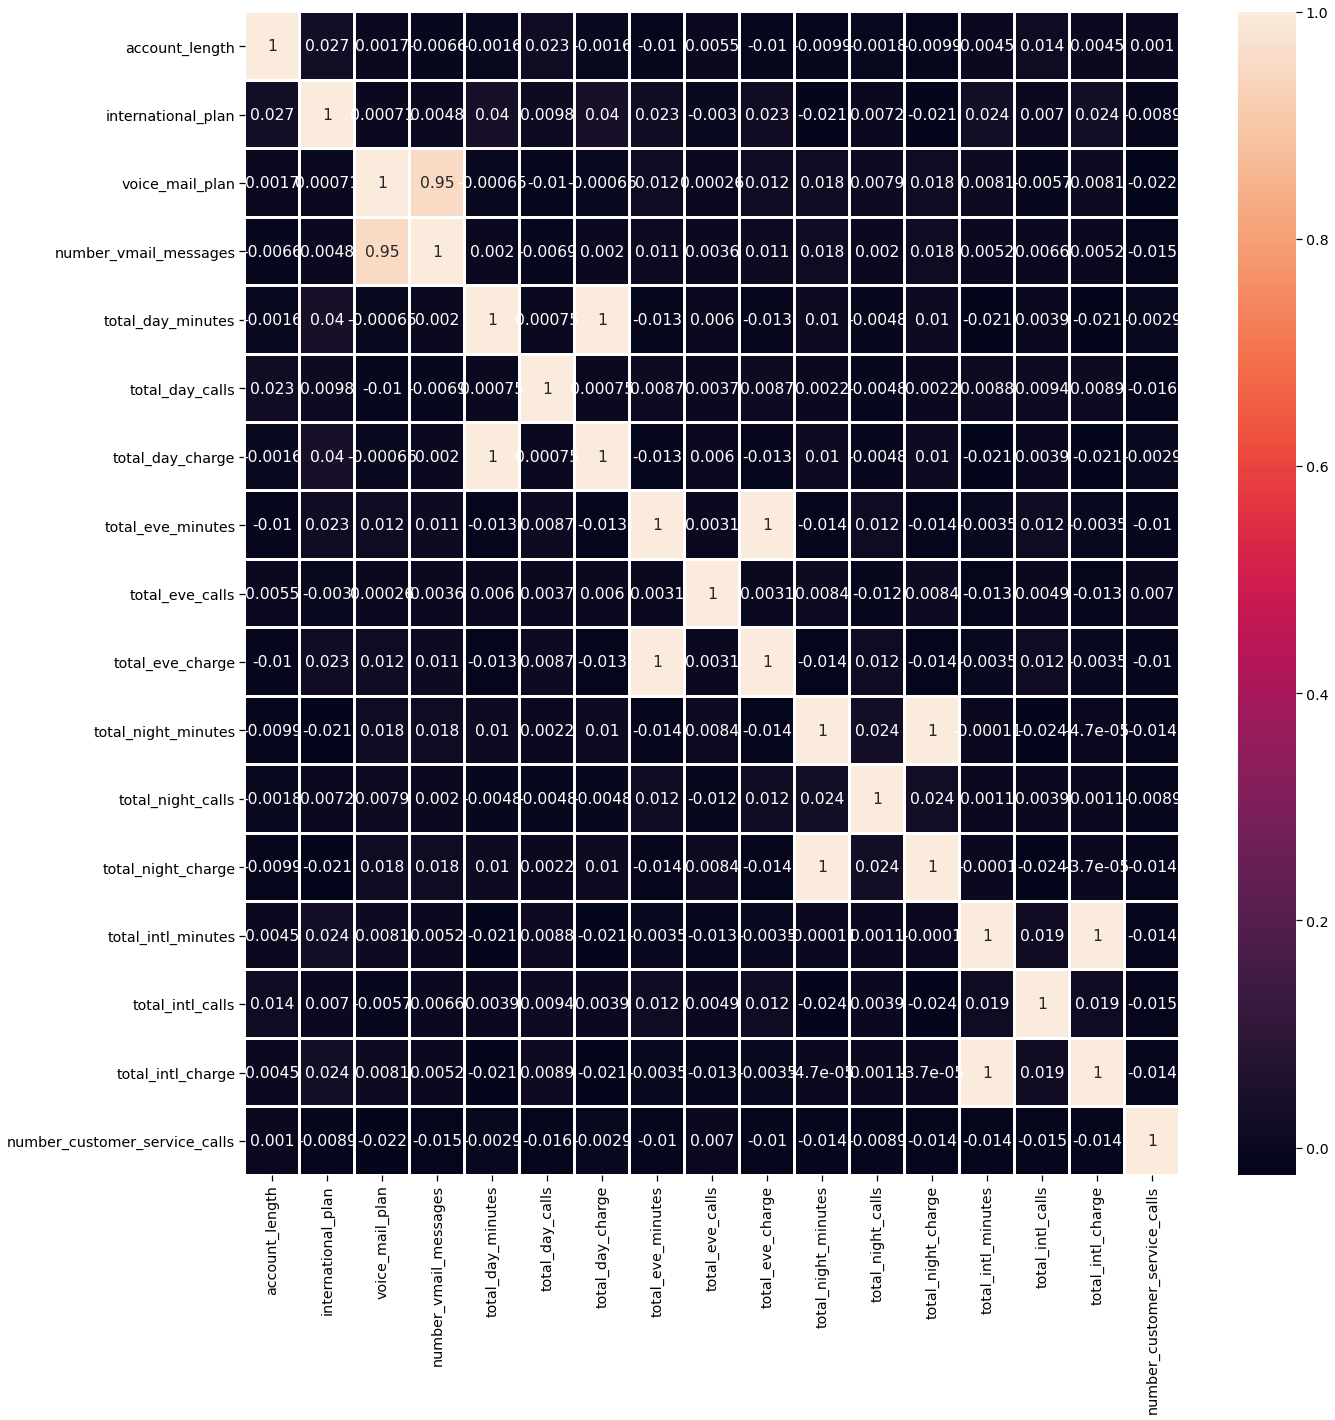

In [89]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(df2.corr(),annot=True,linewidth=2)
plt.tight_layout()

In [90]:
# Removing correlation
df2=df2.drop('total_day_charge',axis=1)
df2=df2.drop('total_eve_charge',axis=1)
df2=df2.drop('total_night_charge',axis=1)
df2=df2.drop('total_intl_charge',axis=1)
df2=df2.drop('voice_mail_plan',axis=1)

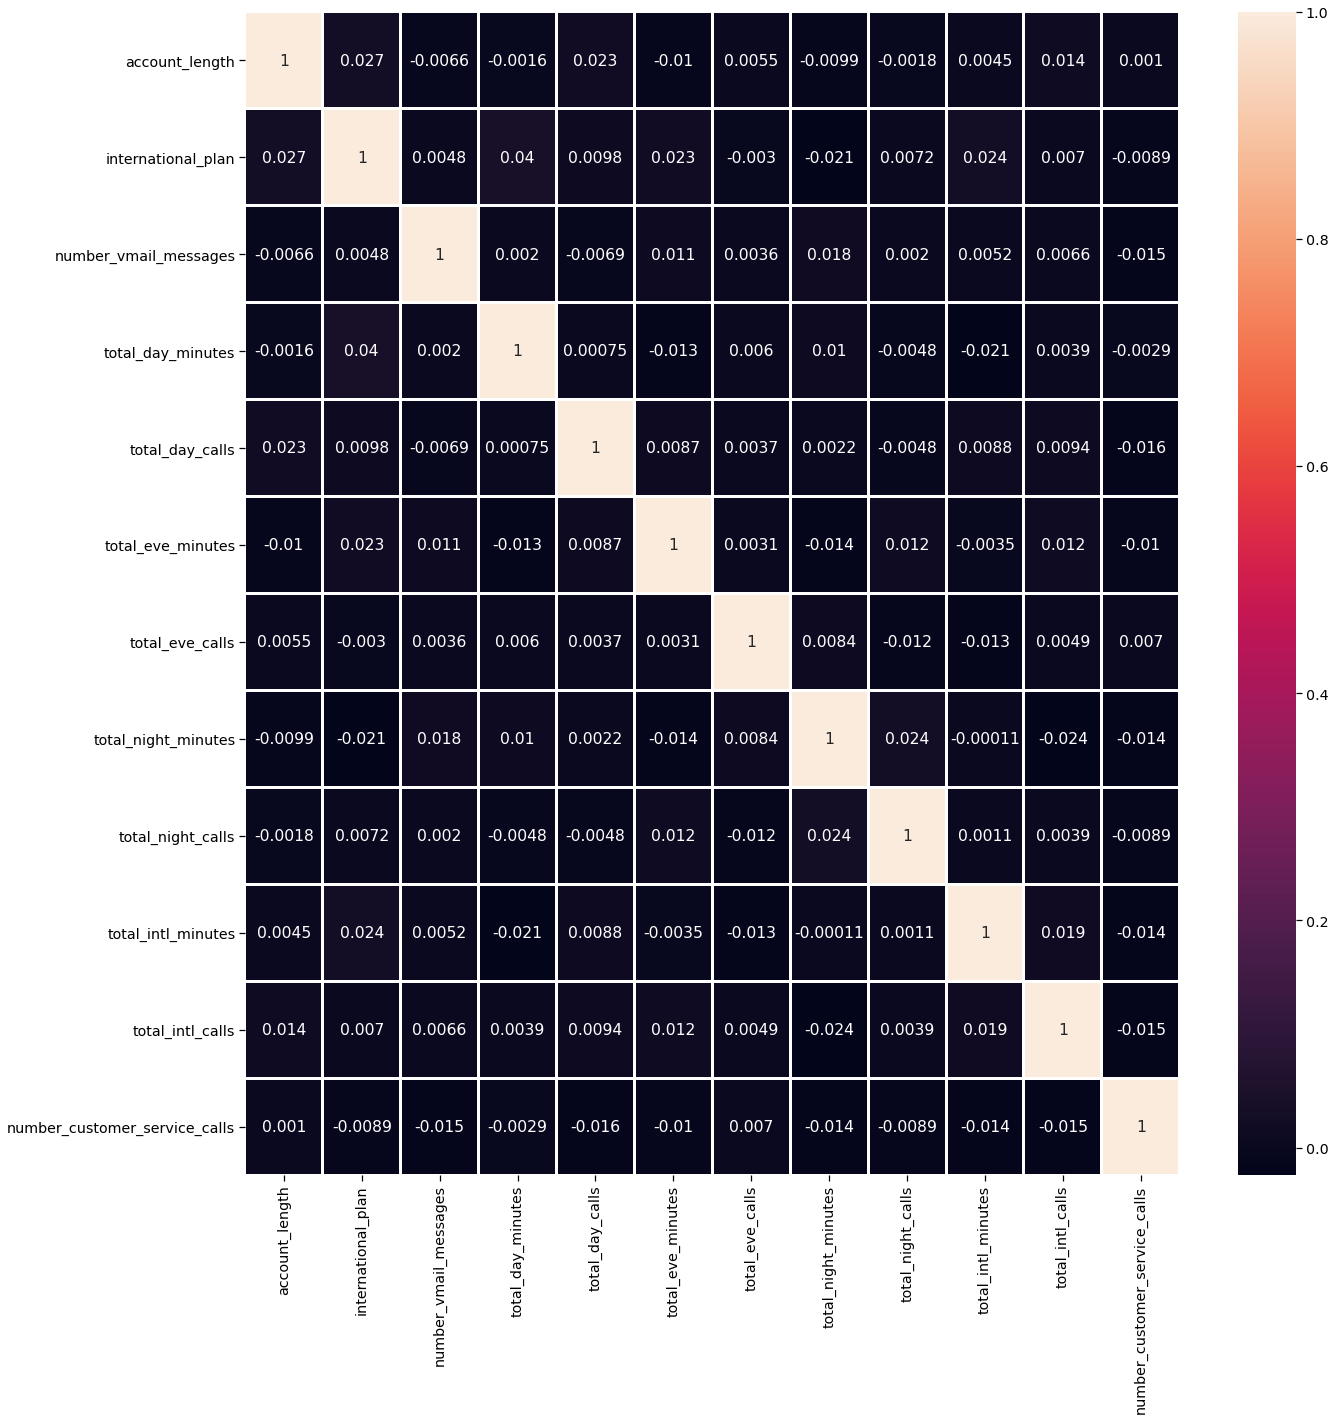

In [91]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(df2.corr(),annot=True,linewidth=2)
plt.tight_layout()

In [92]:
# z-score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df2)
scaled_data=scaler.transform(df2)
scaled_data

array([[ 0.17039882, -0.32054702,  1.36685697, ...,  1.24790134,
        -0.57916393, -0.42634613],
       [ 0.92618569, -0.32054702, -0.56791143, ...,  0.70437917,
         0.2329267 , -1.1889602 ],
       [-0.40903778,  3.11966717, -0.56791143, ..., -1.3247703 ,
         1.04501732,  0.33626795],
       ...,
       [-0.63577385, -0.32054702, -0.56791143, ..., -1.21606586,
         1.04501732, -0.42634613],
       [-1.26559624, -0.32054702,  2.40865534, ..., -0.12902151,
         0.2329267 ,  0.33626795],
       [-0.35865199, -0.32054702,  1.96217032, ..., -0.34643038,
         4.69942514, -1.1889602 ]])

In [93]:
df2.keys()

Index(['account_length', 'international_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls'],
      dtype='object')

In [94]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
dfr=pd.DataFrame(data=x_pca)
dfr

,0,1,2,3,4,5,6
0,0.270865,-1.563724,0.058873,1.336308,-0.516277,-0.316888,0.042370
1,0.885701,0.550912,-0.622050,1.670782,0.206401,-0.564469,0.185077
2,0.511533,1.574523,-2.948879,-0.589635,2.257396,-1.862132,-0.328242
3,0.836569,0.767578,-1.216808,-0.177424,0.968703,0.800566,-0.899322
4,0.522086,-0.659290,-0.480353,-2.349660,-1.294837,1.245138,-1.281689
...,...,...,...,...,...,...,...
4245,-0.081400,-0.357950,0.460518,-0.929953,0.042123,-0.842689,0.798303
4246,-0.774883,0.941726,0.720673,0.180039,1.088546,-1.188253,-0.148708
4247,-0.006050,0.894361,0.212651,-0.780061,-1.295250,0.336873,0.052493
4248,-0.350929,-2.323693,-1.758346,-0.025745,-1.811282,-0.080682,-0.313863


In [95]:
print(x_pca.shape)
print(scaled_data.shape)

(4250, 7)
(4250, 12)


In [96]:
#with PCA
from sklearn.model_selection import train_test_split
import numpy as np
Xpca_train, Xpca_test, ypca_train, ypca_test= train_test_split(x_pca, df['churn'], test_size= 0.2)

In [97]:
print(Xpca_train.shape)
print(Xpca_test.shape)
print(ypca_train.shape)
print(ypca_test.shape)

(3400, 7)
(850, 7)
(3400,)
(850,)


K value 4
knn_accuracy 0.8741176470588236


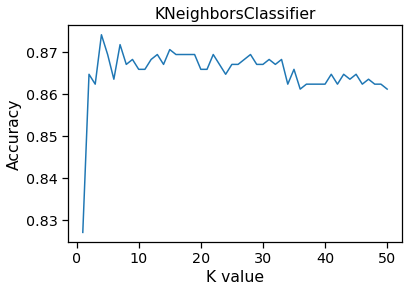

In [98]:
# Knn using PCA
from sklearn.neighbors import KNeighborsClassifier 
x=[]
y=[]
knn_max=0

l=50
for i in range(1,l+1):
    knn2= KNeighborsClassifier(n_neighbors=i)
    knn2.fit(Xpca_train,ypca_train)
    s=knn2.score(Xpca_test,ypca_test)
    if(s>knn_max):
        knn_max=s
        k=i
    x.append(i)
    y.append(s)
print("K value",k)
print("knn_accuracy",knn_max)
plt.plot(x, y)  
plt.title("KNeighborsClassifier")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [99]:
#without PCA
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test= train_test_split(scaled_data, df['churn'], test_size= 0.2)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3400, 12)
(850, 12)
(3400,)
(850,)


K value 3
knn_accuracy 0.8964705882352941


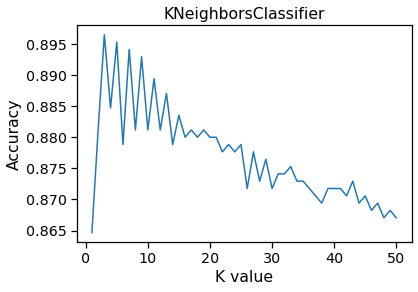

In [101]:
# Knn without PCA
from sklearn.neighbors import KNeighborsClassifier 
x=[]
y=[]
knn_max=0

l=50
for i in range(1,l+1):
    knn2= KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train,y_train)
    s=knn2.score(X_test,y_test)
    if(s>knn_max):
        knn_max=s
        k=i
    x.append(i)
    y.append(s)
print("K value",k)
print("knn_accuracy",knn_max)
plt.plot(x, y)  
plt.title("KNeighborsClassifier")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

max_depth 10
dt_accuracy 0.9494117647058824


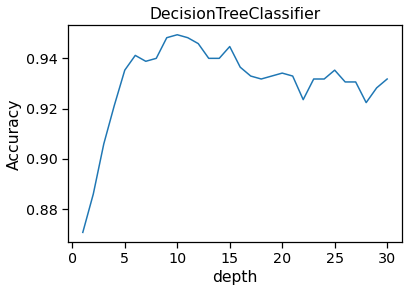

In [102]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
x=[]
y=[]
dt_max=0

l=30
for i in range(1,l+1):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree = dtree.fit(X_train, y_train)
    s=dtree.score(X_test,y_test)
    if(s>dt_max):
        dt_max=s
        dt=i
    x.append(i)
    y.append(s)
    
print("max_depth",dt)
print("dt_accuracy",dt_max)
plt.plot(x, y)  
plt.title("DecisionTreeClassifier")
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()

In [103]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
log_score=logreg.score(X_test,y_test)
log_score

0.8658823529411764

n_estimators value 27
rf_accuracy 0.9658823529411765


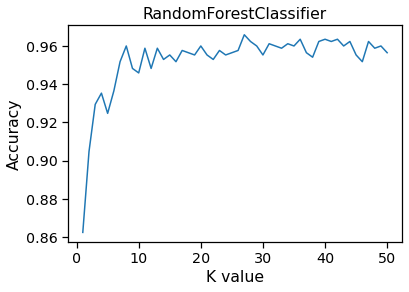

In [104]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
x=[]
y=[]
rf_max=0

l=50
for i in range(1,l+1):
    rf_model=RandomForestClassifier(n_estimators=i)
    rf_model = rf_model.fit(X_train, y_train)
    s=rf_model.score(X_test,y_test)
    if(s>rf_max):
        rf_max=s
        rf=i
    x.append(i)
    y.append(s)
print("n_estimators value",rf)
print("rf_accuracy",rf_max)
plt.plot(x, y)
plt.title("RandomForestClassifier")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

Cross Validation Scores are [0.88970588 0.87647059 0.87647059 0.88529412 0.88382353]
Average Cross Validation score :0.8823529411764707
0.8811764705882353


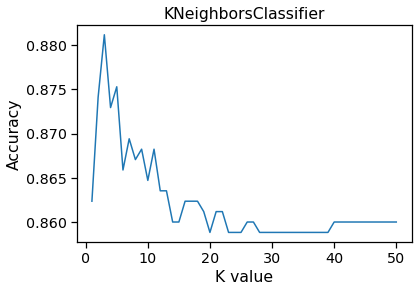

In [105]:
#cross validation KNN
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
knn= KNeighborsClassifier(n_neighbors=k)
kf=KFold(n_splits=5)
knn_score=cross_val_score(knn, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(knn_score))
print("Average Cross Validation score :{}".format(knn_score.mean()))
predicted=cross_val_predict(knn, X_test, y_test, cv=kf)
cv_knn=metrics.accuracy_score(y_test,predicted)
print(cv_knn)
x=[]
y=[]
cv_max=0

l=50
for i in range(1,l+1):
    knn= KNeighborsClassifier(n_neighbors=i)
    kf=KFold(n_splits=5)
    knn_score=cross_val_score(knn, X_train, y_train, cv=kf)
    predicted=cross_val_predict(knn, X_test, y_test, cv=kf)
    cv_knn=metrics.accuracy_score(y_test,predicted)
    if(cv_knn>cv_max):
        cv_max=cv_knn
        cv=i
    x.append(i)
    y.append(cv_knn)

plt.plot(x, y)  
plt.title("KNeighborsClassifier")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [106]:
# cross-validation DT
DecisionTree = DecisionTreeClassifier(max_depth=7)
kf=KFold(n_splits=7)
rt_score=cross_val_score(DecisionTree, X_train, y_train, cv=kf)
print('accuracy obtained using Decision Tree: ', rt_score)
predicted=cross_val_predict(DecisionTree, X_test, y_test, cv=kf)
cv_dt=metrics.accuracy_score(y_test,predicted)
print('accuracy: ',cv_dt)

accuracy obtained using Decision Tree:  [0.94444444 0.94032922 0.94032922 0.91975309 0.94855967 0.95670103
 0.94020619]
accuracy:  0.9329411764705883


In [107]:
# cross-validation RF
RandomForest = RandomForestClassifier(n_estimators=33)
kf=KFold(n_splits=7)
rf_score=cross_val_score(RandomForest, X_train, y_train, cv=kf)
print('accuracy obtained using Regression Tree: ', rf_score)
predicted=cross_val_predict(RandomForest, X_test, y_test, cv=kf)
cv_rf=metrics.accuracy_score(y_test,predicted)
print('accuracy: ',cv_rf)

accuracy obtained using Regression Tree:  [0.94650206 0.95061728 0.94238683 0.94238683 0.95473251 0.96907216
 0.9443299 ]
accuracy:  0.9352941176470588


In [108]:
# ensembling 
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier


model_1 = LogisticRegression()
model_2 = KNeighborsClassifier(n_neighbors=8)
model_3 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()
# model_4 = DecisionTreeRegressor(max_depth=10)

# Making the final model using voting classifier
ensemble = VotingClassifier(
    estimators=[('LogisticRegression', model_1), ('knn', model_2), ('DecisionTreeClassifier', model_3), ('RandomForestClassifier', model_5)], voting='hard')

# # training all the model on the train dataset
# ensemble.fit(X_train_knn_svm, Y_train)

#training all the models using cross validation:
kf=KFold(n_splits=5)
ensemble_score=cross_val_score(ensemble, X_train, y_train, cv=kf)

print('accuracy of this ensemble is: ', ensemble_score)
print('average accuracy of this ensemble is: ', ensemble_score.mean())
predicted=cross_val_predict(ensemble, X_test, y_test, cv=kf)
en_score=metrics.accuracy_score(y_test,predicted)
print(en_score)

accuracy of this ensemble is:  [0.90294118 0.89264706 0.87794118 0.9        0.90588235]
average accuracy of this ensemble is:  0.8958823529411765
0.8894117647058823


{'KNN': 0.8964705882352941, 'logistic': 0.8658823529411764, 'DT': 0.9494117647058824, 'RF': 0.9658823529411765, 'CV_knn': 0.86, 'CV_DT': 0.9329411764705883, 'CV_RF': 0.9352941176470588, 'En': 0.8894117647058823}


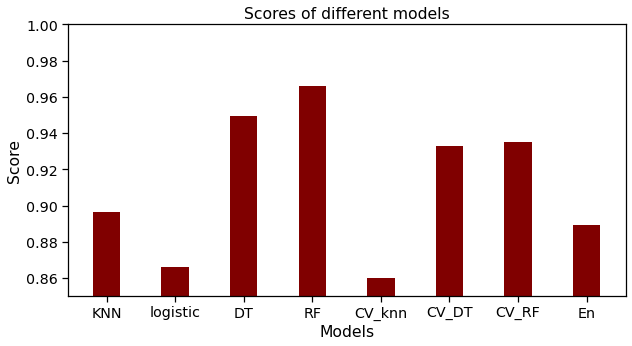

In [109]:
graph = {'KNN':knn_max, 'logistic':log_score, 'DT':dt_max, 'RF':rf_max,'CV_knn':cv_knn,'CV_DT':cv_dt,'CV_RF':cv_rf,'En':en_score}
print(graph)
models = list(graph.keys())
scores = list(graph.values())

fig = plt.figure(figsize = (10, 5))
 

plt.bar(models, scores, color ='maroon',
        width = 0.4)
min_y_lim = 0.85
max_y_lim = 1
plt.ylim(min_y_lim,max_y_lim)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Scores of different models")
plt.show()


In [110]:
#Randomforest is giving maximum accuracy
rf_model2=RandomForestClassifier(n_estimators=rf)
rf_model2 = rf_model.fit(X_train, y_train)
s1=rf_model2.score(X_test,y_test)
s1

0.96

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred= rf_model2.predict(X_test)
rf_cm=confusion_matrix(y_test,y_pred)
rf_cm

array([[726,   5],
       [ 29,  90]], dtype=int64)

In [112]:
# DecisionTreeClassifier
dtree2 = DecisionTreeClassifier(max_depth=dt)
dtree2 = dtree2.fit(X_train, y_train)
s3=dtree2.score(X_test,y_test)
s3

0.9447058823529412

In [113]:
y_pred= dtree2.predict(X_test)
dt_cm=confusion_matrix(y_test,y_pred)
dt_cm

array([[716,  15],
       [ 32,  87]], dtype=int64)

In [114]:
test_df=pd.read_csv("test.csv")

In [115]:
test_df.drop(['area_code','state','id'],inplace=True,axis=1)

In [116]:
test_df['international_plan']=test_df['international_plan'].map(mapping)
test_df['voice_mail_plan']=test_df['voice_mail_plan'].map(mapping)

In [117]:
test_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,73,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [118]:
test_df=test_df.drop('total_day_charge',axis=1)
test_df=test_df.drop('total_eve_charge',axis=1)
test_df=test_df.drop('total_night_charge',axis=1)
test_df=test_df.drop('total_intl_charge',axis=1)
test_df=test_df.drop('voice_mail_plan',axis=1)

In [119]:
scaler2=StandardScaler()
scaler2.fit(df2)
scaled_data2=scaler2.transform(test_df)
scaled_data2

array([[ 0.69944963, -0.32054702,  1.2924428 , ..., -0.0927867 ,
        -0.57916393, -0.42634613],
       [ 0.44752067,  3.11966717, -0.56791143, ..., -1.43347473,
         0.63897201, -1.1889602 ],
       [-0.96328149, -0.32054702, -0.56791143, ...,  1.03049247,
         0.63897201,  1.8614961 ],
       ...,
       [ 1.30407913, -0.32054702, -0.56791143, ...,  1.61024946,
        -0.98520924,  1.09888202],
       [-0.98847439, -0.32054702, -0.56791143, ...,  1.21166653,
        -0.17311861, -0.42634613],
       [ 0.22078461, -0.32054702, -0.56791143, ..., -0.63630887,
         0.63897201, -1.1889602 ]])

In [120]:
y_pred= rf_model2.predict(scaled_data2)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
new_y=pd.DataFrame(y_pred)
new_y.rename(columns={0:'churn'},inplace=True)
new_y

,churn
0,0
1,0
2,1
3,0
4,0
...,...
745,0
746,0
747,0
748,0


In [123]:
for i in range(0,750):
    if(new_y['churn'][i]==0):
        new_y['churn'][i]='no'
    else:
        new_y['churn'][i]='yes'
        
new_y

,churn
0,no
1,no
2,yes
3,no
4,no
...,...
745,no
746,no
747,no
748,no


In [124]:
final_df=pd.concat([test_df,new_y.reindex(test_df.index)], axis=1)
final_df

,account_length,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,128,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,118,1,0,223.4,98,220.6,101,203.9,118,6.3,6,0,no
2,62,0,0,120.7,70,307.2,76,203.0,99,13.1,6,4,yes
3,93,0,0,190.7,114,218.2,111,129.6,121,8.1,3,3,no
4,174,0,0,124.3,76,277.1,112,250.7,115,15.5,5,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,119.4,99,226.3,97,202.7,111,11.3,7,0,no
746,73,0,0,177.2,118,270.5,84,241.8,112,12.3,2,3,no
747,152,0,0,184.2,90,256.8,73,213.6,113,14.7,2,3,no
748,61,0,0,140.6,89,172.8,128,212.4,97,13.6,4,1,no
